In [2645]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2646]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()    

In [2647]:
def checkCorrFF(df):
    plt.figure(figsize=(12,10))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

In [2648]:
def checkCorrFT(df, target):
    sns.pairplot(df, hue = target)

In [2649]:
def checkYesNo(df, col:str, colTarget:str):
    checkdf = df.loc[df[col] == colTarget]
    return checkdf['y'].value_counts()

# 6 13 16

In [2650]:
df = pd.read_csv('HWdata/bank/bank-full.csv')
df_test = pd.read_csv('HWdata/bank/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


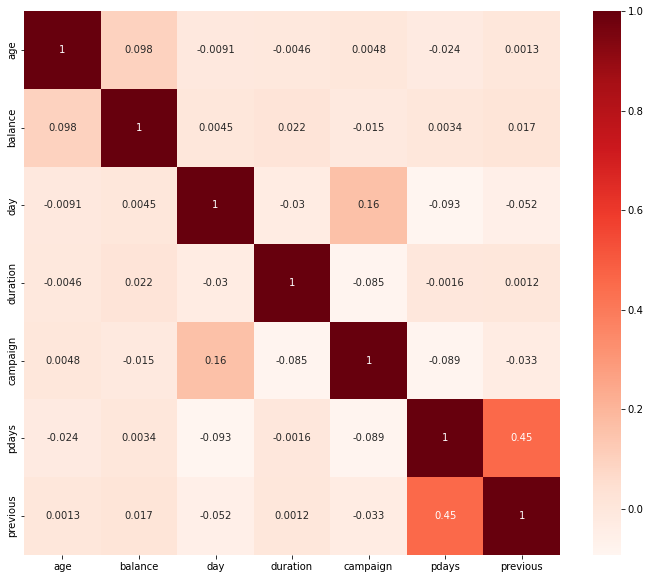

In [2651]:
checkCorrFF(df)

In [2652]:
# Drop features w/ high correlation
df.drop(columns=['pdays','day','month'], inplace=True)
df_test.drop(columns=['pdays','day','month'], inplace=True)

### Check 'education' feature and manage unknown data

In [2653]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [2654]:
# Replace unknown education with most common
df['education'] = df['education'].replace({'unknown':'secondary'})
df['education'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

### Check 'job' feature and manage unknown data

In [2655]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [2656]:
# Remove unknown data since it is a small portion of the data
# df.drop(df[df['job'] == 'unknown'].index, inplace=True)
# Replace unknown contact with most common
df['job'] = df['job'].replace({'unknown':'blue-collar'})
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

### Check 'contact' feature and manage unknown data

In [2657]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [2658]:
# Replace unknown contact with most common
df['contact'] = df['contact'].replace({'unknown':'cellular'})
df['contact'].value_counts()

cellular     42305
telephone     2906
Name: contact, dtype: int64

### Check 'poutcome' feature and manage unknown data

In [2659]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [2660]:
# Drop poutcome since it is mostly unknown
df.drop(columns=['poutcome'], inplace=True)

### Feature scale

In [2661]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df['campaign']=min_max_scaler.fit_transform(df['campaign'].values.reshape(-1,1))
df['balance']=min_max_scaler.fit_transform(df['balance'].values.reshape(-1,1))
df['age']=min_max_scaler.fit_transform(df['age'].values.reshape(-1,1))
df['duration']=min_max_scaler.fit_transform(df['duration'].values.reshape(-1,1))
df['previous']=min_max_scaler.fit_transform(df['previous'].values.reshape(-1,1))

In [2662]:
df_test['campaign']=min_max_scaler.fit_transform(df_test['campaign'].values.reshape(-1,1))
df_test['balance']=min_max_scaler.fit_transform(df_test['balance'].values.reshape(-1,1))
df_test['age']=min_max_scaler.fit_transform(df_test['age'].values.reshape(-1,1))
df_test['duration']=min_max_scaler.fit_transform(df_test['duration'].values.reshape(-1,1))
df_test['previous']=min_max_scaler.fit_transform(df_test['previous'].values.reshape(-1,1))

In [2663]:
df['campaign'].describe()

count    45211.000000
mean         0.028449
std          0.049968
min          0.000000
25%          0.000000
50%          0.016129
75%          0.032258
max          1.000000
Name: campaign, dtype: float64

In [2664]:
df['balance'].describe()

count    45211.000000
mean         0.085171
std          0.027643
min          0.000000
25%          0.073457
50%          0.076871
75%          0.085768
max          1.000000
Name: balance, dtype: float64

### Transform Categorical Data using One-hot Encoding

In [2665]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x = pd.get_dummies(x)

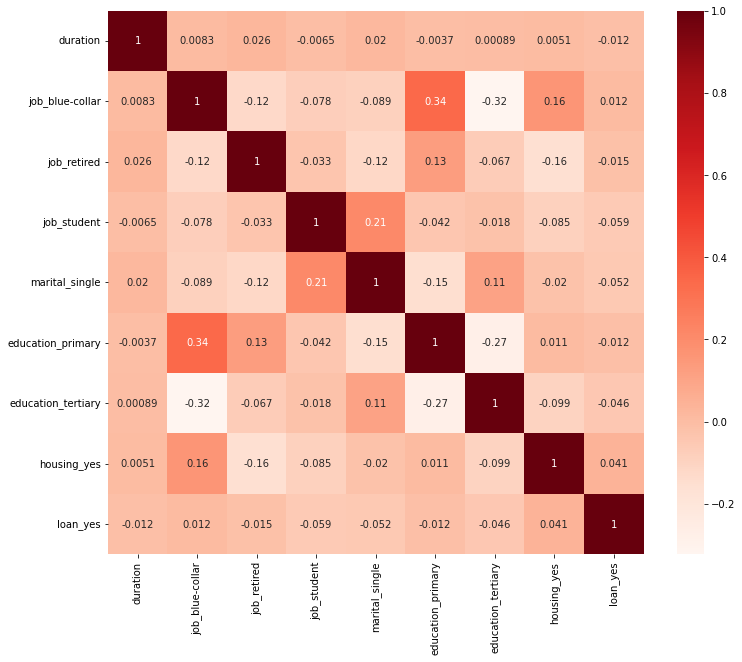

In [2666]:
selector = SelectKBest(chi2, k=12)
df_new = selector.fit(x, y)

col = selector.get_support(indices=True)
df_new = x.iloc[:,col]

df_new = df_new.drop(columns=['housing_no','marital_married','job_management'])

checkCorrFF(df_new)

In [2667]:
df = pd.concat([df_new, y], axis=1)
# df_new
# checkCorrFT(df_new.iloc[:,lambda x: [0,1,2,-1]], 'y')

In [2668]:
# # Drop No outlier
# df = df.drop(df[df['campaign'] >= 40].index)
# df['campaign'].value_counts()

# # Drop Yes outlier
# cp20up = df[df['campaign'] > 18]
# df = df.drop(cp20up[cp20up['y'] == 'yes'].index)

In [2669]:
# df['campaign'].describe()
# diagnostic_plots(df,'campaign')

In [2670]:
# Q1 = df['campaign'].quantile(0.25)
# Q3 = df['campaign'].quantile(0.75)
# IQR = Q3 - Q1   # Interquartile range
# upper_lim = Q3 + 1.5*IQR
# lower_lim = Q1 - 1.5*IQR
# outlier = df[(df['campaign'] > upper_lim) | (df['campaign'] < lower_lim)]
# len(df['campaign']) - len(outlier)

In [2671]:
# df = df.drop(outlier.index)
# # df = df.drop(df[df['campaign'] > upper_lim].index)
# # df = df.drop(df[df['campaign'] < lower_lim].index)
# # df['campaign'] = df['campaign'][~(df['campaign'] > upper_lim) | (df['campaign'] < lower_lim)].astype(int)
# df['y'].value_counts()

In [2672]:
# sns.displot(df['campaign'], bins=10 , kde=True)
# df['campaign']=np.log(df['campaign'])

In [2673]:
# df['campaign'].value_counts()

In [2674]:
# sns.boxplot(x='campaign', y='y', data=df)

In [2675]:
# sns.catplot(x= 'y',y='campaign', data=df) # plot relationship between data

In [2676]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1] 
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_train)
print("model score: %.8f" % clf.score(x_test, y_test))

model score: 0.88632091


In [2677]:
# x2 = df_test.iloc[:,:-1] 

# y_pred_test = clf.predict(x2)
# print("model score: %.8f" % clf.score(x_test, y_test))

/home/azthorax/anaconda3/envs/fra501_env/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- age
- balance
- campaign
- contact
- default
- ...
Feature names seen at fit time, yet now missing:
- education_primary
- education_tertiary
- housing_yes
- job_blue-collar
- job_retired
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'unemployed'

/home/azthorax/anaconda3/envs/fra501_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


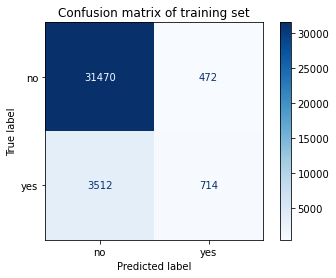

In [ ]:
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  